# Esure Assignment -- Geoff Chambers -- 03/02/2021
## 1. Exploratory Data Analysis

**Objective:** Understand and clean the dataset, prior to analysing predictive value of variables 
- Load and inspect data
- Missing/null data
- Field data types, categorical vs numeric
- Distributions of field values, outliers and skewness
---

In [1]:
### Environment: conda proj-home-ins

# Extensions & config
%load_ext autoreload
%autoreload 1

# General package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD AND INSPECT DATA

In [2]:
# Load to dataframe

ifile = "../data/kaggle_dataset/home_insurance.csv"

try:
    policies_df = pd.read_csv(ifile)
except FileNotFoundError as e:
    raise FileNotFoundError(f"{e}:\nCheck path and/or run ../scripts/get_kaggle_dataset.sh") from None
else:
    print("Loaded {} x {} dataframe from: {}".format(*policies_df.shape, ifile))

Loaded 256136 x 66 dataframe from: ../data/kaggle_dataset/home_insurance.csv


In [3]:
# Inspect data

display(policies_df.head())
display(policies_df.info())

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,...,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,...,N,N,N,NaN,NaN,NaN,274.81,Lapsed,1,P000001
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,...,N,N,Y,308.83,-9.27,NaN,308.83,Live,2,P000002
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,...,N,N,Y,52.65,52.65,03/11/2010,52.65,Live,3,P000003
3,11/23/2007,12/12/2007,N,R,NaN,N,NaN,N,NaN,0.0,...,N,N,N,NaN,NaN,NaN,54.23,Live,4,P000004
4,11/22/2007,15/12/2007,N,R,NaN,N,NaN,Y,5.0,1000000.0,...,N,N,N,NaN,NaN,NaN,244.58,Live,5,P000005


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256136 entries, 0 to 256135
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   QUOTE_DATE              129524 non-null  object 
 1   COVER_START             189021 non-null  object 
 2   CLAIM3YEARS             190039 non-null  object 
 3   P1_EMP_STATUS           189021 non-null  object 
 4   P1_PT_EMP_STATUS        1782 non-null    object 
 5   BUS_USE                 189021 non-null  object 
 6   CLERICAL                2944 non-null    object 
 7   AD_BUILDINGS            189021 non-null  object 
 8   RISK_RATED_AREA_B       140876 non-null  float64
 9   SUM_INSURED_BUILDINGS   189021 non-null  float64
 10  NCD_GRANTED_YEARS_B     189021 non-null  float64
 11  AD_CONTENTS             189021 non-null  object 
 12  RISK_RATED_AREA_C       180290 non-null  float64
 13  SUM_INSURED_CONTENTS    189021 non-null  float64
 14  NCD_GRANTED_YEARS_C 

None

In [4]:
# Make fields lower-case ... save me loads of time with cap lock and shift

policies_df.columns = policies_df.columns.str.lower()

- Although 256136 records, most fields only have 189021 non-null entries
- Fields 'i' and 'Police' are only ones without nulls, they appear to both be policy number and perhaps should be used as index ...

In [5]:
# Break 'head' into chunks to have a look at all fields

head_df = policies_df.head(3)

c1 = 0
while c1 < head_df.shape[1]:
    c2 = c1 + 20
    display(head_df.iloc[:, c1:c2])
    c1 = c2

,quote_date,cover_start,claim3years,p1_emp_status,p1_pt_emp_status,bus_use,clerical,ad_buildings,risk_rated_area_b,sum_insured_buildings,ncd_granted_years_b,ad_contents,risk_rated_area_c,sum_insured_contents,ncd_granted_years_c,contents_cover,buildings_cover,spec_sum_insured,spec_item_prem,unspec_hrp_prem
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,7.0,Y,6.0,50000.0,7.0,Y,Y,7500.0,44.42,12.45
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,6.0,Y,9.0,50000.0,7.0,Y,Y,0.0,0.00,24.60
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,0.0,Y,12.0,50000.0,7.0,N,Y,0.0,0.00,0.00


,p1_dob,p1_mar_status,p1_policy_refused,p1_sex,appr_alarm,appr_locks,bedrooms,roof_construction,wall_construction,flooding,listed,max_days_unocc,neigh_watch,occ_status,ownership_type,paying_guests,prop_type,safe_installed,sec_disc_req,subsidence
0,15/06/1939,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,Y,Y,N
1,20/05/1970,M,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,3.0,0.0,2.0,N,N,N
2,10/06/1947,S,N,M,Y,Y,2.0,11.0,15.0,Y,3.0,0.0,Y,PH,8.0,0.0,9.0,N,Y,N


,yearbuilt,campaign_desc,payment_method,payment_frequency,legal_addon_pre_ren,legal_addon_post_ren,home_em_addon_pre_ren,home_em_addon_post_ren,garden_addon_pre_ren,garden_addon_post_ren,keycare_addon_pre_ren,keycare_addon_post_ren,hp1_addon_pre_ren,hp1_addon_post_ren,hp2_addon_pre_ren,hp2_addon_post_ren,hp3_addon_pre_ren,hp3_addon_post_ren,mta_flag,mta_fap
0,1960.0,NaN,PureDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN
1,1960.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,308.83
2,1946.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,52.65


,mta_aprp,mta_date,last_ann_prem_gross,pol_status,i,police
0,NaN,NaN,274.81,Lapsed,1,P000001
1,-9.27,NaN,308.83,Live,2,P000002
2,52.65,03/11/2010,52.65,Live,3,P000003


In [6]:
# Verify that field 'i' is just the integer part of policy number in field 'police', and drop it

check = policies_df.police.str.lstrip('P').astype(policies_df.i.dtype).equals(policies_df.i)
assert check, "Mismatch between 'i' and 'police'"

policies_df.drop(columns=['i'], inplace=True)

In [7]:
# From Kaggle docs, 'police' is policy number and perhaps should be index, verify that it is suitable before setting

check = policies_df.police.notna().all() and not policies_df.police.duplicated().any()
assert check, "'police' unsuitable for index - check this out"

policies_df.set_index('police', inplace=True)

In [8]:
# From 'head' above, different date fields appear to potentially use different format conventions
# - verify this prior to casting to datetime

date_cols = ['quote_date', 'cover_start', 'p1_dob', 'mta_date']

for date_col in date_cols:
    print(f"Date field ranges for '{date_col}':")
    split_fields = policies_df[date_col].dropna().str.split('/', expand=True).astype(int)
    for split_col in split_fields.columns:
        print(f"  - field {split_col} ranges from {split_fields[split_col].min()} to {split_fields[split_col].max()}")

Date field ranges for 'quote_date':
  - field 0 ranges from 1 to 12
  - field 1 ranges from 1 to 31
  - field 2 ranges from 2006 to 2012
Date field ranges for 'cover_start':
  - field 0 ranges from 1 to 31
  - field 1 ranges from 1 to 12
  - field 2 ranges from 1992 to 2012
Date field ranges for 'p1_dob':
  - field 0 ranges from 1 to 31
  - field 1 ranges from 1 to 12
  - field 2 ranges from 1890 to 1991
Date field ranges for 'mta_date':
  - field 0 ranges from 1 to 31
  - field 1 ranges from 1 to 12
  - field 2 ranges from 2006 to 2012


In [9]:
# Coerce dates to datetime objects, using format determined from above

policies_df['quote_date'] = pd.to_datetime(policies_df.quote_date, format='%m/%d/%Y')
policies_df['cover_start'] = pd.to_datetime(policies_df.cover_start, format='%d/%m/%Y')
policies_df['p1_dob'] = pd.to_datetime(policies_df.p1_dob, format='%d/%m/%Y')
policies_df['mta_date'] = pd.to_datetime(policies_df.mta_date, format='%d/%m/%Y')

In [10]:
# Replace raw dates with relevant(?) derived fields

# Capture cover start date as year, month, day-of-month
policies_df['cover_start_y'] = policies_df.cover_start.dt.year
policies_df['cover_start_m'] = policies_df.cover_start.dt.month
policies_df['cover_start_d'] = policies_df.cover_start.dt.day

# Lag between quote and cover start
policies_df['quote_cover_days'] = (policies_df.cover_start - policies_df.quote_date).dt.days

# Lag between cover start and mta
policies_df['cover_mta_days'] = (policies_df.mta_date - policies_df.cover_start).dt.days

# P1 age at cover_start (in years, with fraction)
policies_df['p1_age_yrs'] = (policies_df.cover_start - policies_df.p1_dob).dt.days / 365.25

# Check new derived fields for outliers
display(policies_df[['cover_start_y', 'cover_start_m', 'cover_start_d', 'quote_cover_days', 'cover_mta_days', 'p1_age_yrs']]
        .describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).transpose())

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
cover_start_y,189021.0,2006.986007,3.899098,1992.000000,1996.000000,1999.000000,2005.000000,2008.000000,2010.000000,2011.000000,2011.000000,2012.00000
cover_start_m,189021.0,5.895292,4.904094,1.000000,1.000000,1.000000,2.000000,3.000000,11.000000,12.000000,12.000000,12.00000
cover_start_d,189021.0,12.565043,9.889770,1.000000,1.000000,1.000000,2.000000,12.000000,21.000000,29.000000,31.000000,31.00000
quote_cover_days,79144.0,52.654187,178.798868,-4636.000000,0.000000,0.000000,8.000000,19.000000,30.000000,384.000000,802.000000,1323.00000
cover_mta_days,26430.0,1261.423383,1332.193029,0.000000,0.000000,0.000000,118.000000,731.000000,2106.000000,4010.000000,5095.710000,6560.00000
p1_age_yrs,189021.0,67.571396,10.722740,18.455852,37.695277,50.570842,60.599589,67.991786,75.148528,84.249144,89.415469,113.03217


In [11]:
# Make cover start month and day-of-month categorical
policies_df['cover_start_m'] = pd.Categorical(policies_df.cover_start_m, categories=range(1, 13), ordered=True)
policies_df['cover_start_d'] = pd.Categorical(policies_df.cover_start_d, categories=range(1, 32), ordered=True)

In [12]:
# Remove original date fields
policies_df.drop(columns=['cover_start', 'quote_date', 'p1_dob', 'mta_date'], inplace=True)

## MISSING DATA

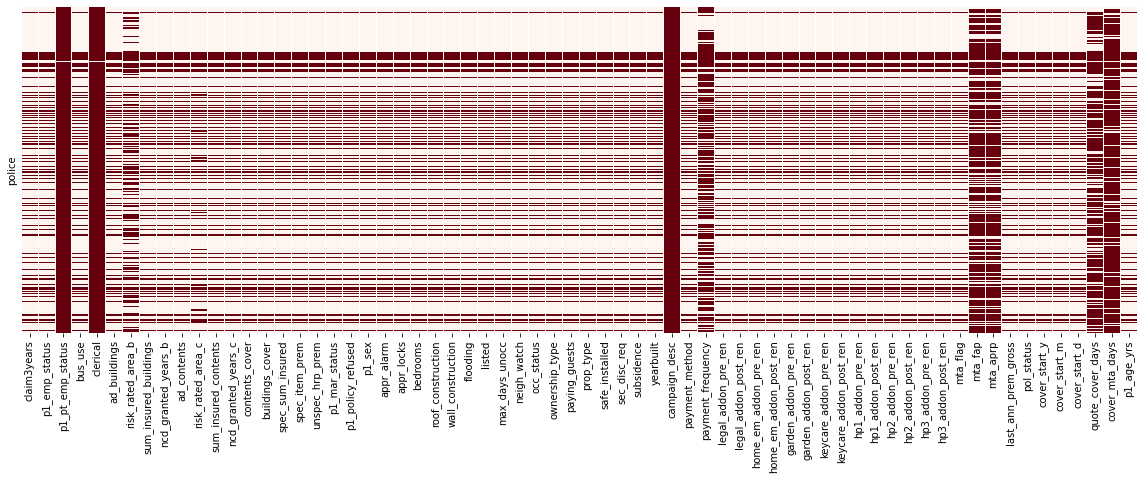

In [13]:
# Quicklook at distribution of null values

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(policies_df.isnull(), ax=ax, yticklabels=False, cbar=False, cmap='Reds')
plt.show()

In [14]:
# mta_{x} fields have similar null pattern - they're driven mainly by mta_flag

agg_null_fract = lambda ser: ser.isnull().mean()
display(policies_df.mta_flag.value_counts(dropna=False))

mta_cols = [c for c in policies_df.columns if 'mta_' in c and c != 'mta_flag']
grpby = policies_df.fillna({'mta_flag': 'null'}).groupby('mta_flag')
display(grpby[mta_cols].agg(agg_null_fract))

N      134319
NaN     66097
Y       55720
Name: mta_flag, dtype: int64

,mta_fap,mta_aprp,cover_mta_days
mta_flag,,,
N,1.0,1.0,1.000000
Y,0.0,0.0,0.525664
null,1.0,1.0,1.000000


- Many records are mainly null across most fields
    - Likely to drop these from analysis
    - From earlier inspection with info method, probably 189021/256136 records with sufficient data
- Several fields are mostly null: p1_pt_emp_status, clerical, campaign_desc, mta_{x}
    - Likely to remove these from analysis entirely
    - mta fields are null if mta_flag is False or NaN

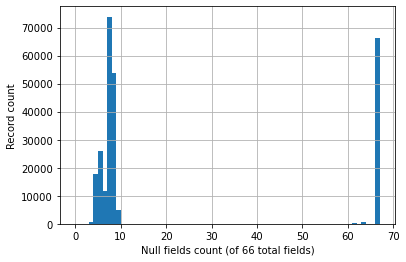

In [15]:
# Distribution of null field count by record

null_count = policies_df.isnull().sum(axis=1)
null_count.hist(bins=range(policies_df.shape[1]+2))
plt.xlabel(f'Null fields count (of {policies_df.shape[1]} total fields)')
plt.ylabel('Record count')
plt.show()

In [16]:
# Remove records with >55 null fields

threshold = 55
mask = null_count > threshold

policies_df = policies_df[~mask]
print(f"Removed {mask.sum()} of {len(mask)} records ({mask.mean():.1%})"
      f" with greater than {threshold} out of {policies_df.shape[1]} fields null")

Removed 67115 of 256136 records (26.2%) with greater than 55 out of 66 fields null


In [17]:
# Fields missing from significant proportion of records

field_null_rate = policies_df.isnull().mean()
signif_null_fields = field_null_rate[field_null_rate > 0.01].sort_values(ascending=False)

display(signif_null_fields)

campaign_desc        1.000000
p1_pt_emp_status     0.990572
clerical             0.984425
cover_mta_days       0.860174
mta_fap              0.707017
mta_aprp             0.707017
quote_cover_days     0.581295
payment_frequency    0.573836
risk_rated_area_b    0.254707
risk_rated_area_c    0.046191
dtype: float64

In [18]:
# Remove campaign_desc (entirely null), and clerical (mostly null, and according to kaggle is for internal business use)

policies_df.drop(columns=['campaign_desc', 'clerical'], inplace=True)

## DISTRIBUTIONS OF NUMERIC FIELD VALUES
- Summary stats, distributions, and correlations, watch out for:
    - Outliers
    - Skewed distributions

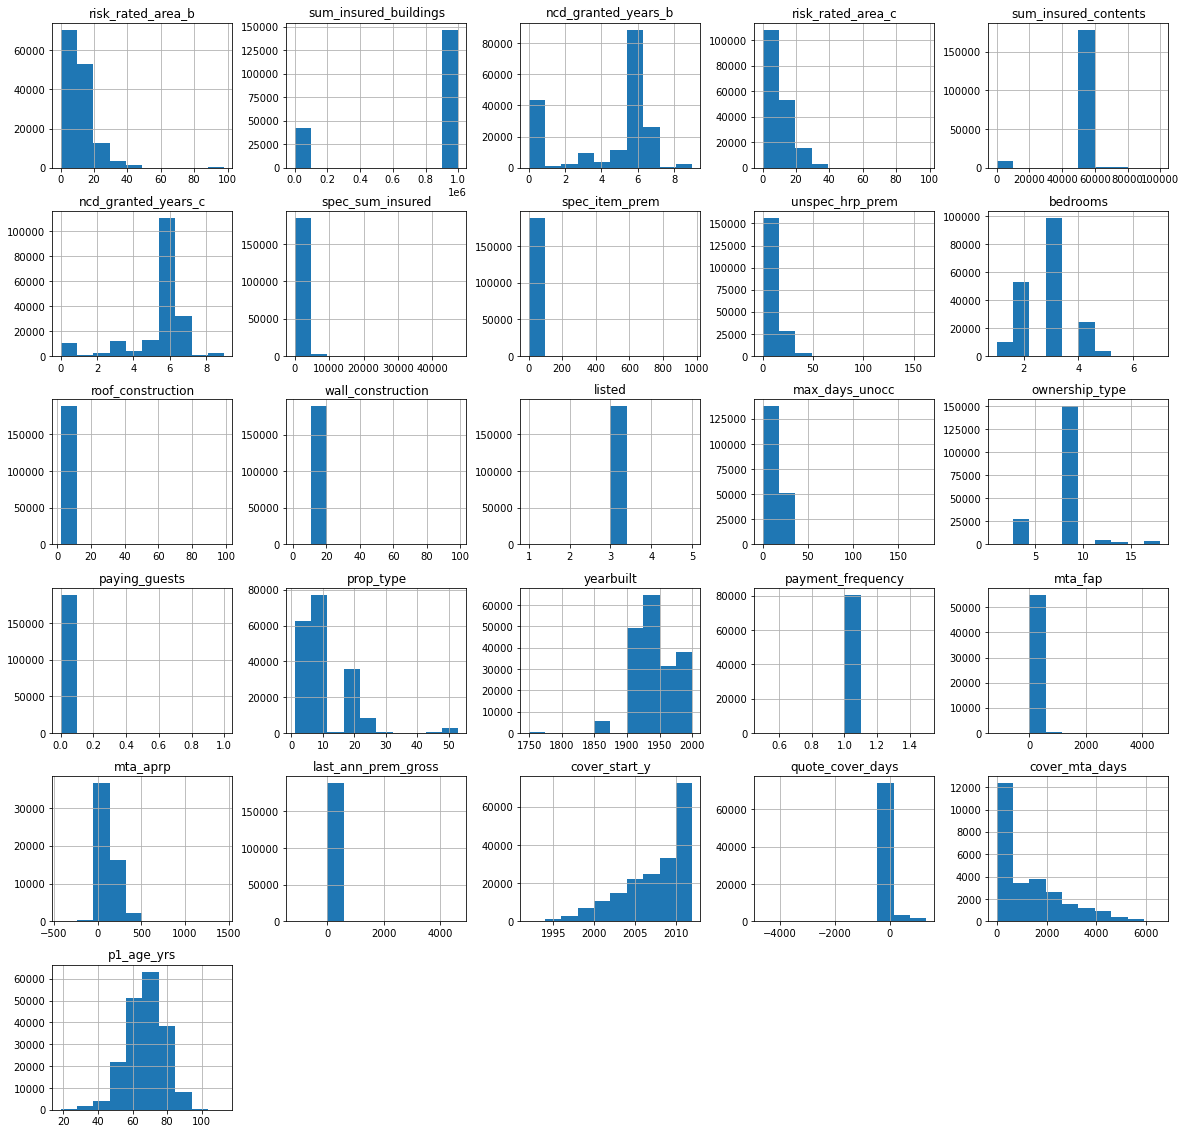

In [19]:
# Distributions of numeric variables

num_df = policies_df.select_dtypes('number')

num_df.hist(figsize=(20, 20))
plt.show()

In [20]:
# Summary stats of numeric variables
display(num_df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).sort_index(axis=1).transpose()) # sort columns to match df.hist behaviour

,count,mean,std,min,5%,25%,50%,75%,95%,max
bedrooms,189021.0,2.779712,0.801433,1.000000,1.000000,2.000000,3.000000,3.000000,4.000000,7.00000
cover_mta_days,26430.0,1261.423383,1332.193029,0.000000,0.000000,118.000000,731.000000,2106.000000,4010.000000,6560.00000
cover_start_y,189021.0,2006.986007,3.899098,1992.000000,1999.000000,2005.000000,2008.000000,2010.000000,2011.000000,2012.00000
last_ann_prem_gross,189021.0,186.724640,99.496240,-1152.680000,51.940000,123.380000,177.340000,234.960000,357.900000,4631.86000
listed,189021.0,2.995672,0.083708,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.00000
max_days_unocc,189021.0,8.471276,15.213401,0.000000,0.000000,0.000000,0.000000,30.000000,30.000000,181.00000
mta_aprp,55380.0,90.575057,121.959967,-423.080000,0.000000,0.000000,0.000000,180.812500,314.392000,1449.24000
mta_fap,55380.0,200.800738,107.926835,-1152.680000,53.979500,137.277500,188.955000,248.782500,381.450500,4631.86000
ncd_granted_years_b,189021.0,4.477132,2.677538,0.000000,0.000000,3.000000,6.000000,6.000000,7.000000,9.00000
ncd_granted_years_c,189021.0,5.497336,1.777452,0.000000,0.000000,6.000000,6.000000,6.000000,7.000000,9.00000


### *Consideration of specific numeric fields ...*
- Several numerical fields appear to possibly be representing a category code in actuality, this is uncertain but are treated as categories (deemed the more cautious approach):
    - listed, ownership_type, prop_type, roof_construction, wall_construction
- Several fields (particularly related to cost/value) are right-skewed to some degree, bear in mind for feature engineering - may want to logarithm (but will need to deal with zeros):
    - max_days_unocc, spec_item_prem, spec_sum_insured, unspec_hrp_prem

In [21]:
def check_values(col):
    val_counts = policies_df[col].value_counts(dropna=False).sort_index()
    print(f"{col} has {len(val_counts)} unique values:")
    display(val_counts)
    
def convert_cat(col):
    policies_df[col] = policies_df[col].astype(int).astype('category')
    print(f"-- converted {col} to categorical data")

In [22]:
# last_ann_prem_gross has outliers on both sides, but not entirely sure whether they're poor data or not
# - could negative annual premium be reflecting a rebate of some sort??
mask = policies_df.last_ann_prem_gross <= 0
print(f"Restricting to positive last_ann_prem_gross would remove {mask.sum()} of {len(mask)} records ({mask.mean():.2%})")

Restricting to positive last_ann_prem_gross would remove 33 of 189021 records (0.02%)


In [23]:
# quote_cover_days has outliers on both sides, but not entirely sure whether they're poor data or not
# - could negative gap between quote and cover be a new quote on existing cover, or is it bad data??
mask = policies_df.quote_cover_days < 0
print(f"Restricting to quote_cover_days >=0 would remove {mask.sum()} of {len(mask)} records ({mask.mean():.2%})")

Restricting to quote_cover_days >=0 would remove 476 of 189021 records (0.25%)


In [24]:
# listed is presumably actually a category
# - from kaggle dataset description, it refers to a national heritage designation
# - because this is probably ordinal, and values are spaced evenly and without extremes, may be able to keep this numeric
check_values('listed')
#convert_cat('listed')

listed has 5 unique values:


1.0        30
2.0       933
3.0    187933
4.0        75
5.0        50
Name: listed, dtype: int64

In [25]:
# ownership_type sounds like something that should be a category, but isn't clear as such from data
# - err on cautious side, make categorical
check_values('ownership_type')
convert_cat('ownership_type')

ownership_type has 14 unique values:


1.0          5
2.0        416
3.0      27388
6.0         12
7.0        158
8.0     149755
11.0       118
12.0      4688
13.0       109
14.0      2610
15.0         4
16.0        28
17.0        83
18.0      3647
Name: ownership_type, dtype: int64

-- converted ownership_type to categorical data


In [26]:
# paying_guests could actually be a flag (either 0 or 1), but other similar features have Y/N
# - will assume it is actually a tenant count, and therefore be treated as numeric

In [27]:
# payment_frequency is a bit unclear, perhaps 1 implies paying on time and NaN not??
# keep in mind for later, maybe need to drop this from modelling
check_values('payment_frequency')

payment_frequency has 2 unique values:


1.0     80554
NaN    108467
Name: payment_frequency, dtype: int64

In [28]:
# prop_type sounds like something that should be a category, but isn't clear as such from data
# - err on cautious side, make categorical
check_values('prop_type')
convert_cat('prop_type')

prop_type has 36 unique values:


1.0     29776
2.0     32089
3.0        23
4.0       631
7.0      5767
8.0         1
9.0     16224
10.0    55230
16.0      359
17.0      625
18.0     6362
19.0    28948
20.0       27
21.0       20
22.0       66
23.0        4
24.0       14
25.0     5924
26.0     2535
27.0       27
28.0        5
29.0       28
30.0       25
31.0       93
32.0      557
37.0       23
38.0        8
39.0       16
40.0       51
44.0       21
45.0      315
47.0      312
48.0     1803
51.0      678
52.0      114
53.0      320
Name: prop_type, dtype: int64

-- converted prop_type to categorical data


In [29]:
# roof_construction sounds like something that should be a category, but isn't clear as such from data
# - err on cautious side, make categorical
check_values('roof_construction')
convert_cat('roof_construction')

roof_construction has 17 unique values:


2.0         97
3.0         11
4.0        157
5.0         37
6.0          1
7.0         85
8.0          7
9.0         13
10.0        25
11.0    187840
12.0         1
14.0         7
15.0        49
16.0        10
18.0         1
19.0       669
99.0        11
Name: roof_construction, dtype: int64

-- converted roof_construction to categorical data


In [30]:
# wall_construction sounds like something that should be a category, but isn't clear as such from data
# - err on cautious side, make categorical
check_values('wall_construction')
convert_cat('wall_construction')

wall_construction has 19 unique values:


1.0          2
2.0         11
3.0        371
4.0         35
5.0         64
6.0          1
9.0         20
11.0        52
12.0         3
14.0        76
15.0    188066
16.0        79
18.0        29
19.0       154
20.0        25
21.0        10
22.0         4
23.0         9
99.0        10
Name: wall_construction, dtype: int64

-- converted wall_construction to categorical data


### *Correlations amongst numeric fields ...*
Nothing too surprising in correlations at first glance
- Premium, coverage amount, house size are correlated with each other, as would be expected
- Geographic risk of building and contents is correlated

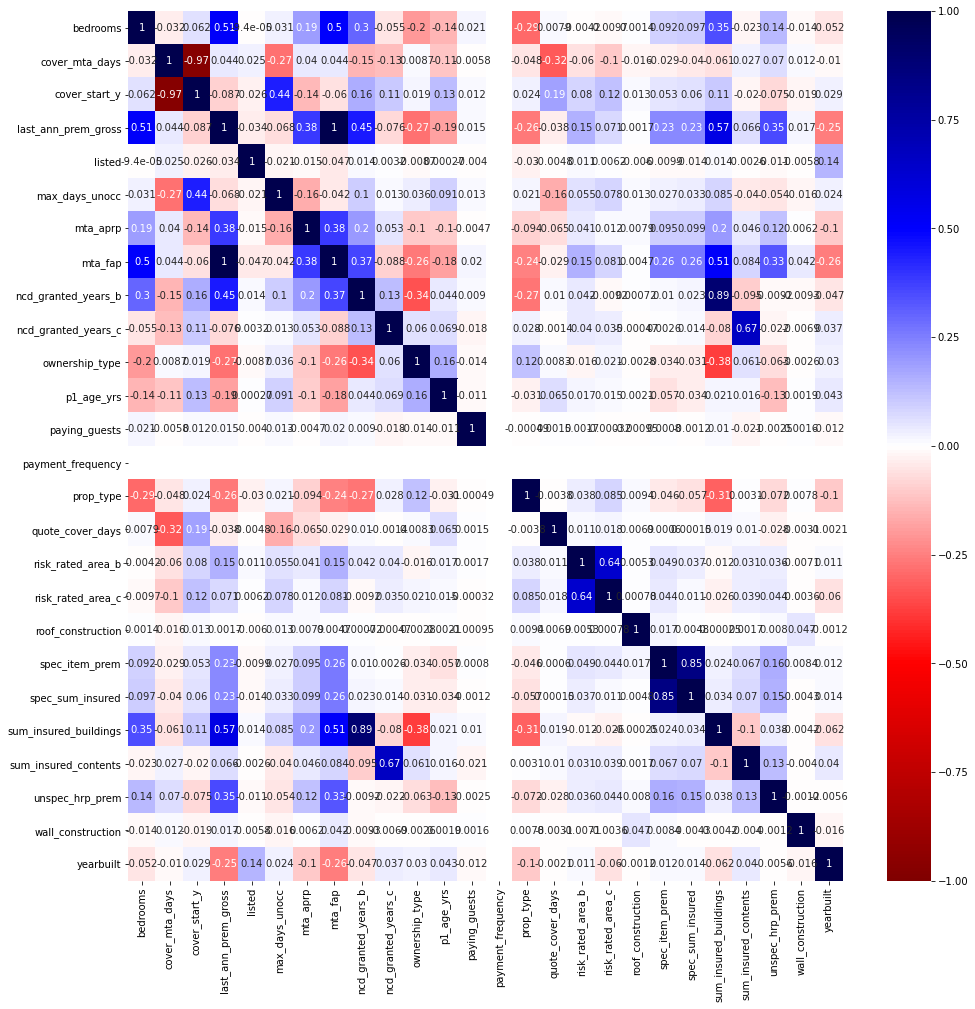

In [31]:
# Visualise correlations between numeric variables
correlations = num_df.sort_index(axis=1).corr() # sort columns to match df.hist ordering

fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(correlations, ax=ax, annot=True, vmin=-1, vmax=1, cmap='seismic_r')
plt.show()

## CATEGORICAL FIELD VALUES

In [32]:
# High-level description of categorical fields

cat_df = policies_df.select_dtypes(exclude='number')

display(cat_df.describe().transpose())

,count,unique,top,freq
claim3years,189021,2,N,167185
p1_emp_status,189021,11,R,146621
p1_pt_emp_status,1782,9,E,1259
bus_use,189021,2,N,186077
ad_buildings,189021,2,Y,147259
ad_contents,189021,2,Y,180452
contents_cover,189021,2,Y,147259
buildings_cover,189021,2,Y,180452
p1_mar_status,189021,10,M,66474
p1_policy_refused,189021,2,N,188958


In [33]:
# Many categoricals appear to be binary Y/N - coerce these to booleans

def cast_yn_2_bool(ser):
    """Checks if a Series contains only {'y', 'n'} (case-independent), and casts to bool if so
    Series with null values are not modified
    Returns a copy of input series
    """
    try:
        upper_ser = ser.str.upper()
    except AttributeError:
        # not a string series, send it back
        return ser
    
    if set(upper_ser.unique()) != {'Y', 'N'}:
        # not a binary Y/N series, send it back
        return ser
    
    return (upper_ser == 'Y')

policies_df = policies_df.apply(cast_yn_2_bool, axis=0)

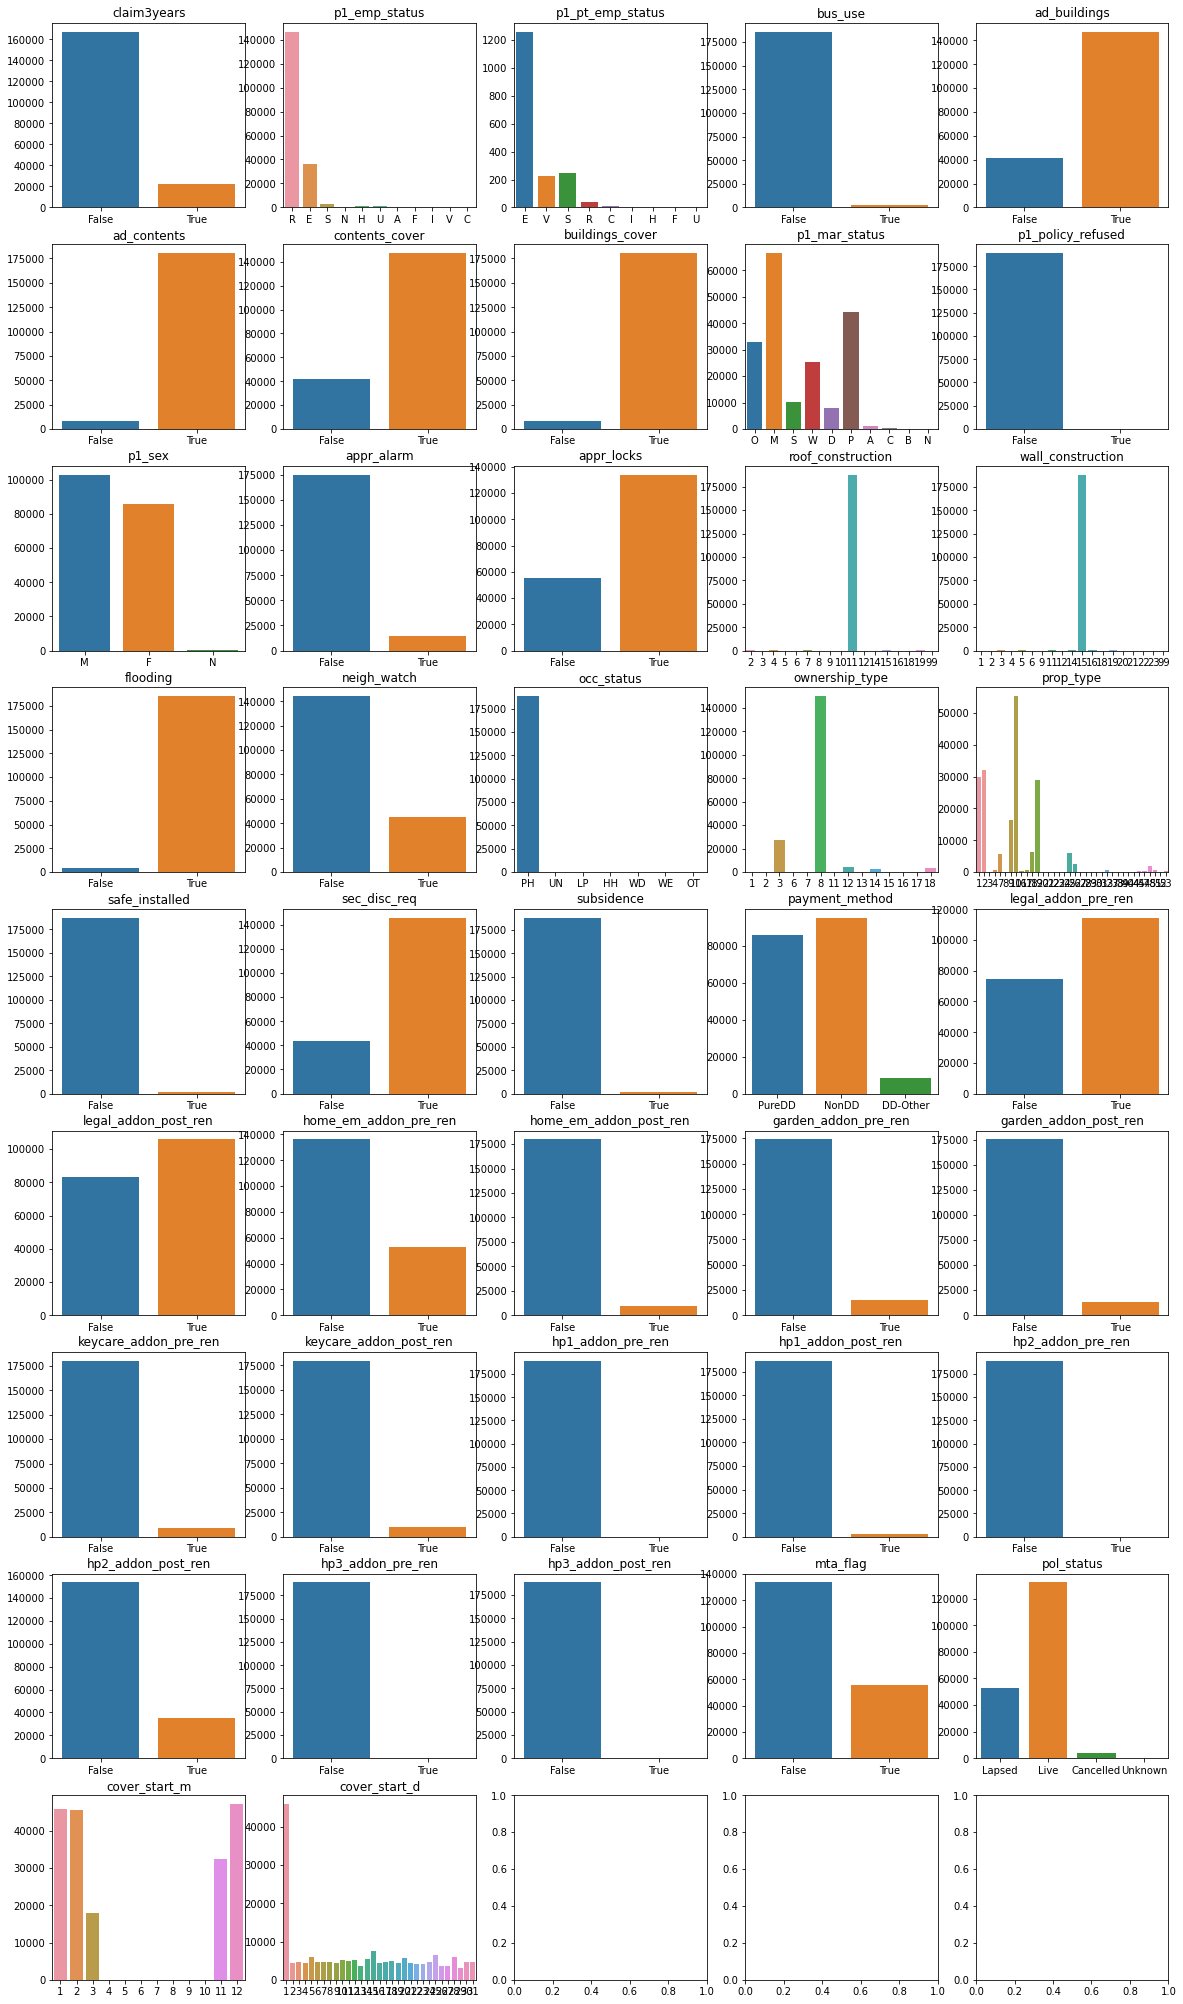

In [34]:
# Look at distribution of records across categories for all categorical fields
# - warning, this is a bit slow to run

cat_fields = cat_df.columns

# plot layout
cols = 5
rows = len(cat_fields) // cols + 1
fig, axes = plt.subplots(rows, cols, figsize=(20, 20*rows/cols))
axes1d = axes.ravel()

for i, col in enumerate(cat_fields):
    ax = axes1d[i]
    sns.countplot(x=col, data=policies_df, ax=ax)
    ax.set(xlabel='', ylabel='', title=col)
plt.show()

In [35]:
# Save out any particular categorical distributions of interest

save_images = {
    'ownership_type': 'Ownership Type',
    'prop_type': 'Property Type'
}
save_images = None

if save_images is not None:
    print("Saving images:")
    for col, label in save_images.items():
        fig, ax = plt.subplots(figsize=(8, 4))
        sns.countplot(x=col, data=policies_df, ax=ax)
        ax.set_xlabel(label, fontsize=12)
        ax.set_ylabel('Record Count', fontsize=12)
        ax.set_title(f'Distribution of {label}', fontsize=14)
        ax.grid(axis='y')
        fname = f"../images/dist_{col.replace('_', '-')}.png"
        fig.savefig(fname)
        plt.close()
        print(f"  {fname}")

### *Consideration of specific categorical fields ...*
- Many categories are highly asymmetric, e.g.,:
    - p1_emp_status (employment status) dominantly retired (surprising)
    - Roof and wall construction almost entirely one particular code
    - Similarly, ownership and property type dominated by a relatively small number of codes
    - Susceptible to floods (flooding) dominantly True - somewhat surprising, is this dataset for a particular geography?
    - Other binary fields which are asymmetric but unsurprisingly: bus_use (commerical use), subsidence, safe_installed, policy_refused, the hp1/hp2/hp3 optional add-ons (which I've no idea what they are)
- Several fields have a large number of categories with many under-sampled, this may cause dimensionality and sampling problems when one-hot-encoded, e.g., roof_construction, wall_construction, occ_status, ownership_type, prop_type
    - With better understanding of these codes, perhaps they could be lumped into higher-level categories
- Cover start appears to be almost entirely in winter months, oddly, and also on the first of the month (less suprising perhaps)

In [36]:
def disp_category_breakdown(col):
    print(f"Breakdown category proportions for {col}:")
    display(policies_df[col].value_counts(dropna=False) / len(policies_df))

In [37]:
# Employment status breakdown - 78% retired
disp_category_breakdown('p1_emp_status')

Breakdown category proportions for p1_emp_status:


R    0.775686
E    0.192561
S    0.016215
H    0.005655
U    0.004872
N    0.003989
V    0.000360
A    0.000275
F    0.000153
I    0.000148
C    0.000085
Name: p1_emp_status, dtype: float64

In [38]:
# Flooding breakdown - 98% of homes susceptible to flooding
disp_category_breakdown('flooding')

Breakdown category proportions for flooding:


True     0.979367
False    0.020633
Name: flooding, dtype: float64

## TARGET VARIABLE

In [39]:
target_var = 'pol_status'

display(policies_df[target_var].value_counts(dropna=False))

Live         132160
Lapsed        52534
Cancelled      4311
Unknown          16
Name: pol_status, dtype: int64

In [40]:
# Ensure there aren't any nulls in target variable

#policies_df.dropna(subset=[target_var], inplace=True)

# do it a bit more verbosely ...
null_mask = policies_df[target_var].isnull()
if null_mask.any():
    print(f"Removing {null_mask.sum()} records with null target variable")
    policies_df = policies_df[~null_mask]

In [41]:
# Treat as a binary prediction problem, "Lapsed" is 1, otherwise is 0
# - unclear whether 'Cancelled' should be lumped with 'Lapsed', but it is relatively small fraction of values
# - remove more granular target_var

policies_df['lapsed'] = (policies_df[target_var] == 'Lapsed')
policies_df.drop(columns=[target_var], inplace=True)

print(f"Target variable proportion split:")
display(policies_df.lapsed.value_counts() / len(policies_df))

Target variable proportion split:


False    0.722073
True     0.277927
Name: lapsed, dtype: float64

**Base rate of lapsed policies ~28%**

## SAVE CLEANED DATA
Generally, would functionalise the data cleaning steps explored in this notebook to re-use in later notebooks. However, given it's a rushed one-off analysis, easier to just store the cleaned data for later re-use.

In [42]:
print("Sample of cleaned data to be stored")
display(policies_df.head())
display(policies_df.info())

Sample of cleaned data to be stored


,claim3years,p1_emp_status,p1_pt_emp_status,bus_use,ad_buildings,risk_rated_area_b,sum_insured_buildings,ncd_granted_years_b,ad_contents,risk_rated_area_c,...,mta_fap,mta_aprp,last_ann_prem_gross,cover_start_y,cover_start_m,cover_start_d,quote_cover_days,cover_mta_days,p1_age_yrs,lapsed
police,,,,,,,,,,,,,,,,,,,,,
P000001,False,R,NaN,False,True,19.0,1000000.0,7.0,True,6.0,...,NaN,NaN,274.81,2007.0,11,22,0.0,NaN,68.438056,True
P000002,False,E,NaN,True,True,25.0,1000000.0,6.0,True,9.0,...,308.83,-9.27,308.83,2008.0,1,1,40.0,NaN,37.618070,False
P000003,False,E,NaN,False,False,NaN,0.0,0.0,True,12.0,...,52.65,52.65,52.65,2007.0,11,23,0.0,1076.0,60.454483,False
P000004,False,R,NaN,False,False,NaN,0.0,0.0,True,14.0,...,NaN,NaN,54.23,2007.0,12,12,19.0,NaN,81.987680,False
P000005,False,R,NaN,False,True,5.0,1000000.0,7.0,True,10.0,...,NaN,NaN,244.58,2007.0,12,15,23.0,NaN,71.841205,False


<class 'pandas.core.frame.DataFrame'>
Index: 189021 entries, P000001 to P256136
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   claim3years             189021 non-null  bool    
 1   p1_emp_status           189021 non-null  object  
 2   p1_pt_emp_status        1782 non-null    object  
 3   bus_use                 189021 non-null  bool    
 4   ad_buildings            189021 non-null  bool    
 5   risk_rated_area_b       140876 non-null  float64 
 6   sum_insured_buildings   189021 non-null  float64 
 7   ncd_granted_years_b     189021 non-null  float64 
 8   ad_contents             189021 non-null  bool    
 9   risk_rated_area_c       180290 non-null  float64 
 10  sum_insured_contents    189021 non-null  float64 
 11  ncd_granted_years_c     189021 non-null  float64 
 12  contents_cover          189021 non-null  bool    
 13  buildings_cover         189021 non-null  bool    
 14  sp

None

In [43]:
# Store cleaned data - preserves data types

%store policies_df

## OLD / BACKUP CELLS

In [44]:
raise RuntimeError('Stop here, dont run old cells')

RuntimeError: Stop here, dont run old cells